# ADS507-01 Final Project Visualization

Name: Gabi Rivera

### Connecting Database

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import pymysql as mysql
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
import klib

In [3]:
user = os.environ.get('MYSQL_USER')
pwd = os.environ.get('MYSQL_PASS')

In [4]:
conn = mysql.connect(host='localhost',
                      port=int(3306),
                      user=user,
                      password=pwd,
                      db='cancer_insur')

In [5]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
tableNames

,Tables_in_cancer_insur
0,behavior
1,factor
2,insurance_info
3,ipbsf
4,patient
5,symptom


### Tables

In [6]:
#Patient Table: 
pat =pd.read_sql('SELECT * FROM patient',conn)
pat.head(2)

,patient_id,age,gender,bmi_cat,children,region,cancer_id
0,1,33,1,normal,0,northwest,1
1,2,33,1,high,2,southeast,1


In [7]:
#Insurance Information Table: 
ins =pd.read_sql('SELECT * FROM insurance_info',conn)
ins.head(2)

,insurance_id,charge_level,patient_id
0,1,4,1
1,2,1,2


In [8]:
#Behavior Table: 
beh =pd.read_sql('SELECT * FROM behavior',conn)
beh.head(2)

,behavior_id,alcohol_use,smoker,balanced_diet,patient_id
0,1,4,no,2,1
1,2,4,no,2,2


In [9]:
#Factor Table:
fac =pd.read_sql('SELECT * FROM factor',conn)
fac.head(2)

,factor_id,air_pollution,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,cancer_id
0,1,2,5,4,3,2,1
1,2,6,7,7,7,6,2


In [10]:
#Symptom Table: 
sym =pd.read_sql('SELECT * FROM symptom',conn)
sym.head(2)

,cancer_id,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_wifficulty,clubbing_of_inger_nails,frequent_cold,dry_cough,snoring,cancer_level
0,1,2,4,3,4,2,2,3,1,2,3,4,Low
1,2,7,7,4,4,5,6,5,5,4,6,5,High


### Transformation

Created ipbsf View in SQL:

create view ipbsf as
select p.patient_id, p.age, p.gender, i.charge_level,
b.smoker, s.cancer_level, f.air_pollution, 
f.occupational_hazards, f.genetic_risk
from patient p
inner join insurance_info i
on p.patient_id = i.patient_id
inner join behavior b
on p.patient_id = b.patient_id
inner join symptom s
on s.cancer_id = p.cancer_id
inner join factor f
on f.cancer_id = s.cancer_id;

In [11]:
#ipbsf view table (combined all tables and selected specific attributes):
ipbsf =pd.read_sql('SELECT * FROM ipbsf',conn)
ipbsf.head(2)

,patient_id,age,gender,charge_level,smoker,cancer_level,air_pollution,occupational_hazards,genetic_risk
0,1,33,1,4,no,Low,2,4,3
1,2,33,1,1,no,Low,2,4,3


In [12]:
ipbsf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            2374 non-null   int64 
 1   age                   2374 non-null   int64 
 2   gender                2374 non-null   int64 
 3   charge_level          2374 non-null   int64 
 4   smoker                2374 non-null   object
 5   cancer_level          2374 non-null   object
 6   air_pollution         2374 non-null   int64 
 7   occupational_hazards  2374 non-null   int64 
 8   genetic_risk          2374 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 167.0+ KB


In [13]:
ipbsf.describe()

,patient_id,age,gender,charge_level,air_pollution,occupational_hazards,genetic_risk
count,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000
mean,801.086773,37.604465,1.385004,2.510531,4.285173,5.039596,4.817607
std,449.923464,10.822157,0.486699,1.177331,2.125036,2.096721,2.071013
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,424.250000,28.000000,1.000000,2.000000,2.000000,3.000000,3.000000
50%,779.000000,37.000000,1.000000,2.000000,4.000000,5.000000,5.000000
75%,1213.750000,45.000000,2.000000,4.000000,6.000000,7.000000,7.000000
max,1558.000000,64.000000,2.000000,4.000000,8.000000,8.000000,7.000000


Transform age attribute from continous to categorical:

In [14]:
ipbsf['age'] = pd.cut(x=ipbsf['age'], bins=[18, 25, 35, 45, 55, 65],
                      right = False,
                     labels=['18-25', '25-35','35-45',
                             '45-55','55-65'])
ipbsf.head()

,patient_id,age,gender,charge_level,smoker,cancer_level,air_pollution,occupational_hazards,genetic_risk
0,1,25-35,1,4,no,Low,2,4,3
1,2,25-35,1,1,no,Low,2,4,3
2,3,25-35,1,3,no,Low,2,4,3
3,4,25-35,1,3,no,Low,2,4,3
4,4,25-35,1,4,no,Low,2,4,3


In [15]:
klib.missingval_plot(ipbsf)

No missing values found in the dataset.


### Data Exploration

Distribution of (1)Males and (2)Females:

Text(0.5, 1.0, 'Gender Count')

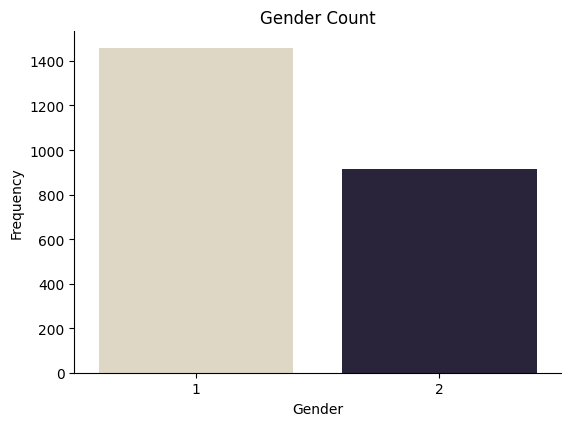

In [16]:
sns.catplot(data= ipbsf,x = 'gender', kind="count", 
             palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(6, 4)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title("Gender Count")

Charge Based on Cancer Level by Gender Bar Plot:

Text(0.5, 1.0, 'Charge Based on Cancer Level by Gender')

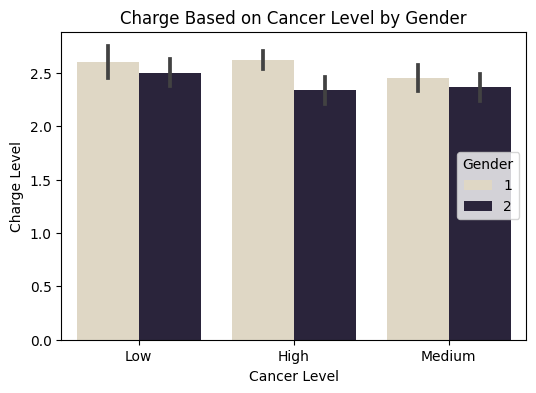

In [17]:
sns.barplot(data= ipbsf,x = 'cancer_level', y = 'charge_level', 
            hue = 'gender', palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(6, 4)
plt.xlabel('Cancer Level')
plt.ylabel('Charge Level')
plt.legend(loc='right', title = 'Gender')
plt.title("Charge Based on Cancer Level by Gender")

Charge Based on Age Group by Gender Bar Plot:

Text(0.5, 1.0, 'Charge Based on Age Group by Gender')

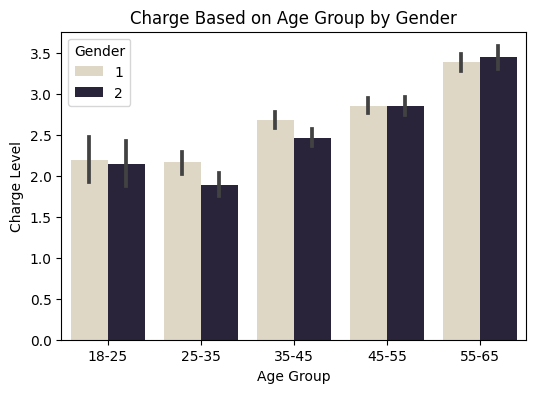

In [18]:
sns.barplot(data= ipbsf,x = 'age', y = 'charge_level', 
            hue = 'gender', palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(6, 4)
plt.xlabel('Age Group')
plt.ylabel('Charge Level')
plt.legend(loc='upper left', title = 'Gender')
plt.title("Charge Based on Age Group by Gender")

Charge Based on Smoking Behavior by Gender Bar Plot: 

Text(0.5, 1.0, 'Charge Based on Smoking Behavior by Gender')

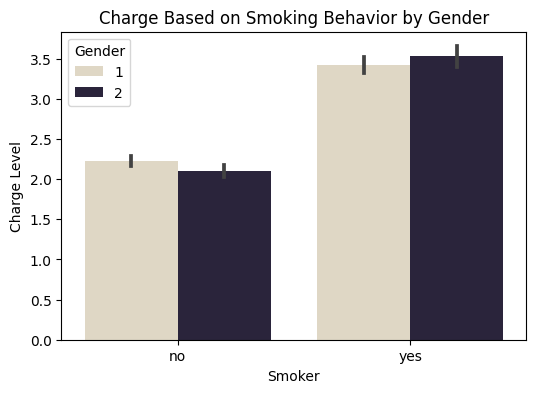

In [19]:
sns.barplot(data= ipbsf,x = 'smoker', y = 'charge_level', 
            hue = 'gender', palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(6, 4)
plt.xlabel('Smoker')
plt.ylabel('Charge Level')
plt.legend(loc='upper left', title = 'Gender')
plt.title("Charge Based on Smoking Behavior by Gender")

Charge Level Based on Air Pollution by Gender:

Text(0.5, 1.0, 'Charge Level Based on Air Pollution by Gender')

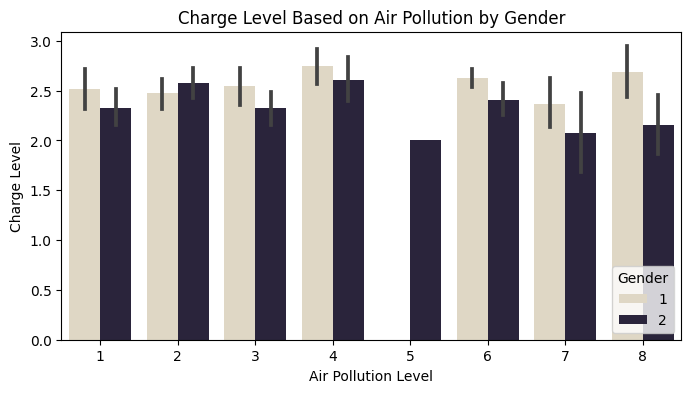

In [20]:
sns.barplot(data= ipbsf,x = 'air_pollution', y = 'charge_level', 
             hue = 'gender', palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(8, 4)
plt.xlabel('Air Pollution Level')
plt.ylabel('Charge Level')
plt.legend(loc='lower right', title = 'Gender')
plt.title("Charge Level Based on Air Pollution by Gender")

Charge Level Based on Occupational Hazards by Gender:

Text(0.5, 1.0, 'Charge Level Based on Occupational Hazards by Gender')

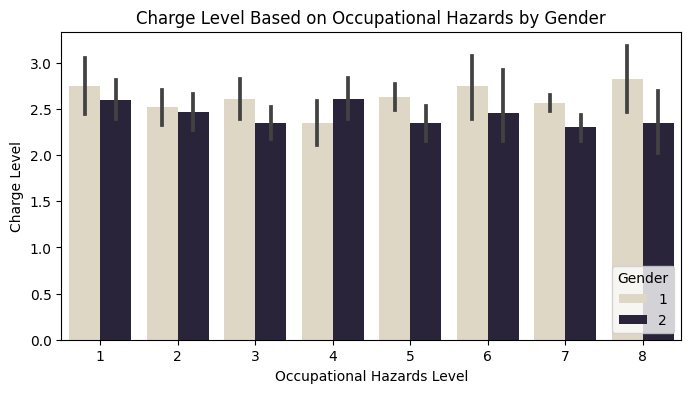

In [21]:
sns.barplot(data= ipbsf,x = 'occupational_hazards', y = 'charge_level', 
             hue = 'gender', palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(8, 4)
plt.xlabel('Occupational Hazards Level')
plt.ylabel('Charge Level')
plt.legend(loc='lower right', title = 'Gender')
plt.title("Charge Level Based on Occupational Hazards by Gender")

Charge Level Based on Genetic Risk by Gender:

Text(0.5, 1.0, 'Charge Level Based on Genetic Risk by Gender')

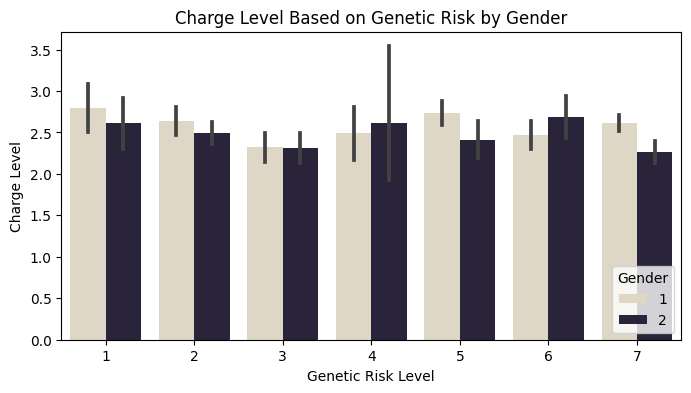

In [22]:
sns.barplot(data= ipbsf,x = 'genetic_risk', y = 'charge_level', 
             hue = 'gender', palette = "ch:s=-.2,r=.6")

plt.gcf().set_size_inches(8, 4)
plt.xlabel('Genetic Risk Level')
plt.ylabel('Charge Level')
plt.legend(loc='lower right', title = 'Gender')
plt.title("Charge Level Based on Genetic Risk by Gender")